# Features Details

| Variable Name                  | Role   | Type        | Demographic                                        | Description                                                                                   | Units | Missing Values |
|--------------------------------|--------|-------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature| Categorical | Gender                                             |                                                                                               |       | no             |
| Age                            | Feature| Continuous  | Age                                                |                                                                                               |       | no             |
| Height                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| Weight                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| family_history_with_overweight| Feature| Binary      |                                                    | Has a family member suffered or suffers from overweight?                                      |       | no             |
| FAVC                           | Feature| Binary      |                                                    | Do you eat high caloric food frequently?                                                      |       | no             |
| FCVC                           | Feature| Integer     |                                                    | Do you usually eat vegetables in your meals? (Frequency of Consuming Vegetables in Meals)                                      |       | no             |
| NCP                            | Feature| Continuous  |                                                    | How many main meals do you have daily?                                                        |       | no             |
| CAEC                           | Feature| Categorical |                                                    | Do you eat any food between meals?                                                            |       | no             |
| SMOKE                          | Feature| Binary      |                                                    | Do you smoke?                                                                                 |       | no             |
| CH2O                           | Feature| Continuous  |                                                    | How much water do you drink daily?                                                           |       | no             |
| SCC                            | Feature| Binary      |                                                    | Do you monitor the calories you eat daily?                                                    |       | no             |
| FAF                            | Feature| Continuous  |                                                    | How often do you have physical activity?                                                     |       | no             |
| TUE                            | Feature| Integer     |                                                    | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature| Categorical |                                                    | How often do you drink alcohol?                                                              |       | no             |
| MTRANS                         | Feature| Categorical |                                                    | Which transportation do you usually use?                                                      |       | no             |
| NObeyesdad                     | Target | Categorical |                                                    | Obesity level                                                                                |       | no             |


In [25]:
# pip install --upgrade scikit-learn

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout
import joblib




In [27]:
df = pd.read_csv("ObesityDataSet.csv")
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [28]:

mask_numeric = df.dtypes == float
df_numerical = df.loc[:, mask_numeric]

df_numerical

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


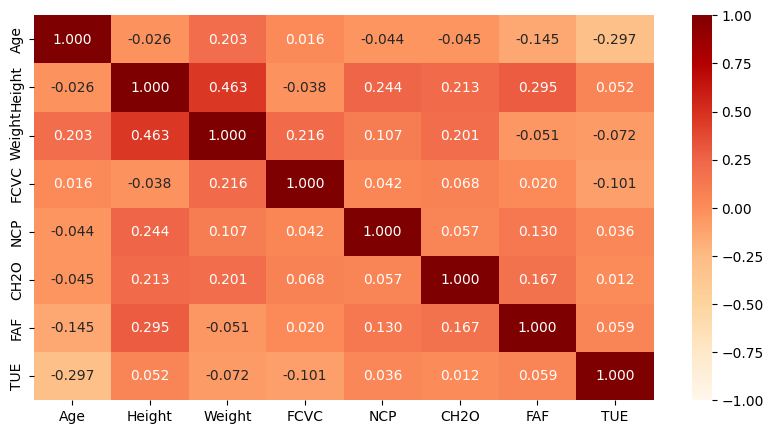

In [29]:
corr_numerical = df_numerical.corr()

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

In [30]:
unique_values_counts = df['NObeyesdad'].value_counts()
unique_values_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

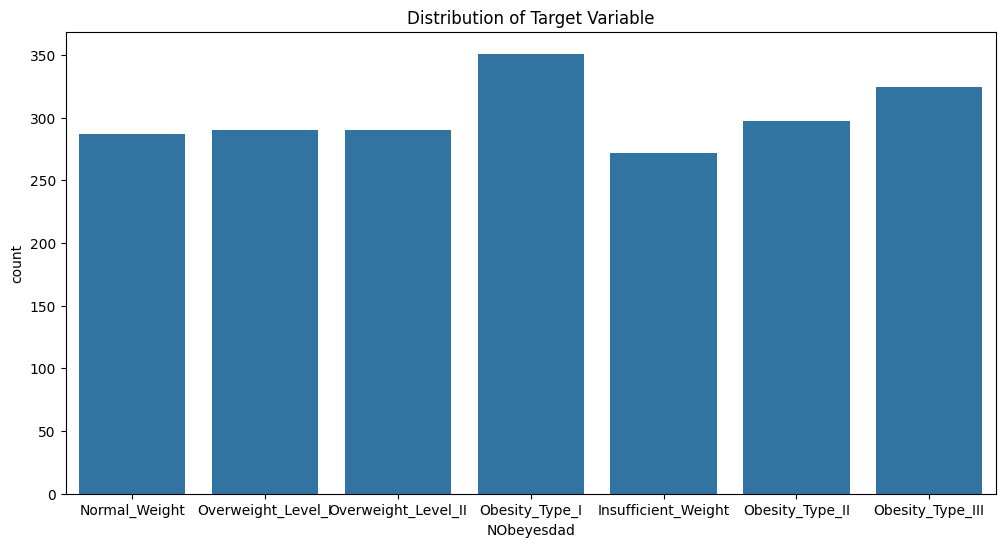

In [31]:

plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=df)
plt.title("Distribution of Target Variable")
plt.show()

# data transfomation

In [32]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [33]:
cat_features

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [34]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [35]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : [0 1]
family_history_with_overweight : [1 0]
FAVC : [0 1]
CAEC : [2 1 0 3]
SMOKE : [0 1]
SCC : [0 1]
CALC : [3 2 1 0]
MTRANS : [3 4 0 2 1]
NObeyesdad : [1 5 6 2 0 3 4]


In [36]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [37]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [38]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# Scale the features
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_roc_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probabilities[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_probabilities[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_probabilities.ravel())
    roc_auc["micro"] = roc_auc_score(y_true_bin, y_probabilities, average="micro")

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Compute precision-recall curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probabilities[:, i])
        average_precision[i] = average_precision_score(y_true_bin[:, i], y_probabilities[:, i])

    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot([0, 1], [1, 0], 'k--', lw=2)
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Precision-recall curve of class {0} (AP = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def plot_calibration_curve(y_true, y_probabilities, n_classes):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    # Plot calibration curve
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(y_true_bin[:, i], y_probabilities[:, i], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=f'Class {i}')
    plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.show()

In [40]:

accuracy_data = []
precision_data = []
recall_data = []
f1_data = []

# RandomForestClassifier

In [41]:
scaler = StandardScaler()
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Initialize lists to store scores for each fold

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
rf_train_scores = []
rf_test_scores = []

for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    RFclassifier = RandomForestClassifier(n_estimators=300,criterion='entropy', min_samples_leaf=2)
    RFclassifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the train set
    y_train_pred = RFclassifier.predict(X_train_scaled)
    rf_train_scores.append(accuracy_score(y_train, y_train_pred))
    
    # Make predictions on the test set
    y_pred = RFclassifier.predict(X_test_scaled)
    rf_test_scores.append(accuracy_score(y_test, y_pred))

    
    # Calculate metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")


# Print training and testing accuracies
print(f"Training Accuracy: {np.mean(rf_train_scores)} (±{np.std(rf_train_scores)})")
print(f"Testing Accuracy: {np.mean(rf_test_scores)} (±{np.std(rf_test_scores)})")

print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Accuracy: 0.9496212121212121 (±0.008604406584545869)
Precision (weighted): 0.9528218870200943 (±0.007760021336445997)
Recall (weighted): 0.9496212121212121 (±0.008604406584545869)
F1-score (weighted): 0.9500535102999361 (±0.008490847175413596)
Training Accuracy: 0.9978521794061906 (±0.00041903029568609603)
Testing Accuracy: 0.9496212121212121 (±0.008604406584545869)
Confusion Matrix (average):
[[63.3  3.8  0.   0.   0.   0.   0. ]
 [ 0.6 68.2  0.   0.   0.   1.6  1. ]
 [ 0.   0.4 87.3  0.5  0.   0.8  1.7]
 [ 0.   0.4  0.8 68.7  0.3  0.   0. ]
 [ 0.   0.   0.2  0.3 78.   0.   0. ]
 [ 0.   7.4  0.   0.   0.  65.7  2.3]
 [ 0.   1.5  1.1  0.1  0.   1.8 70.2]]


In [42]:
from joblib import dump
dump((RFclassifier, scaler), 'rf_modal.joblib')

['rf_modal.joblib']

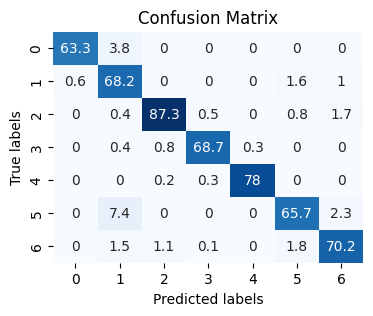

In [43]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Train Test Score Plot

In [44]:
def plot_train_test_score(train_scores, test_scores):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), train_scores, marker='o', label='Training Score')
    plt.plot(range(1, 11), test_scores, marker='o', label='Testing Score')
    plt.title('Training and Testing Scores')
    plt.xlabel('nth fold')
    plt.ylabel('Score')
    plt.xticks(range(1, 11))
    plt.ylim(0.7, 1)  # Set the y-axis limits from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

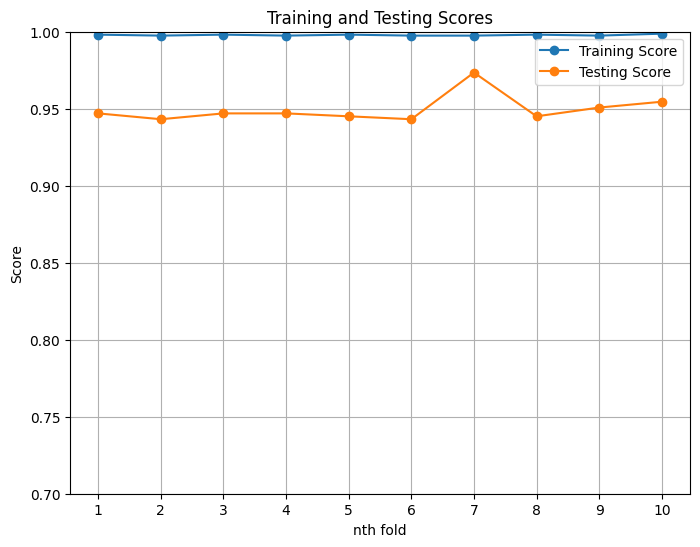

In [45]:
plot_train_test_score(rf_train_scores, rf_test_scores)

# LogisticRegression

In [46]:
from sklearn.metrics import log_loss

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

# Initialize lists to store training and validation costs
training_costs = []
validation_costs = []

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    logreg = LogisticRegression(max_iter=1000, penalty="l2", solver="saga")
    logreg.fit(X_train_scaled, y_train)
    
    # Make predictions on the train set
    train_score = logreg.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    
    # Make predictions on the test set
    test_score = logreg.score(X_test_scaled, y_test)
    test_scores.append(test_score)
    
    y_test_pred = logreg.predict(X_test_scaled)

    # Compute training loss (cost)
    y_train_pred_proba = logreg.predict_proba(X_train_scaled)
    training_loss = log_loss(y_train, y_train_pred_proba)
    training_costs.append(training_loss)
        
    # Compute validation loss (cost)
    y_test_pred_proba = logreg.predict_proba(X_test_scaled)
    validation_loss = log_loss(y_test, y_test_pred_proba)
    validation_costs.append(validation_loss)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_test_pred)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)

accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))


Cross-validation results:
Train Score: 0.8962085308056873 (±0.002788768316573389)
Test Score: 0.8742316784869976 (±0.01323877068557918)
Accuracy: 0.8742316784869976 (±0.01323877068557918)
Precision (weighted): 0.8762965356129859 (±0.011976481457329106)
Recall (weighted): 0.8742316784869976 (±0.01323877068557918)
F1-score (weighted): 0.8723158845142741 (±0.013688908368810638)
Confusion Matrix (average):
[[52.9  1.   0.   0.   0.   0.   0. ]
 [ 8.6 41.6  0.   0.   0.   9.4  1.7]
 [ 0.   0.  61.7  3.5  0.5  0.4  2.3]
 [ 0.   0.   0.7 56.6  0.4  0.   0. ]
 [ 0.   0.   0.2  0.  64.   0.   0. ]
 [ 0.   5.4  0.1  0.   0.  45.8  7.6]
 [ 0.   1.   3.5  0.2  0.1  6.6 47.2]]


In [48]:
dump((logreg, scaler), 'logistic_regression.joblib')

['logistic_regression.joblib']

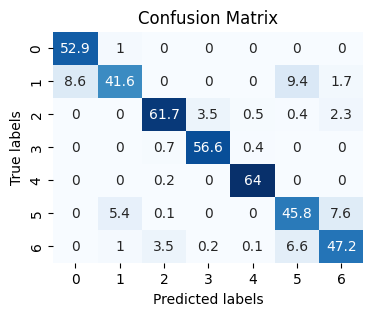

In [49]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

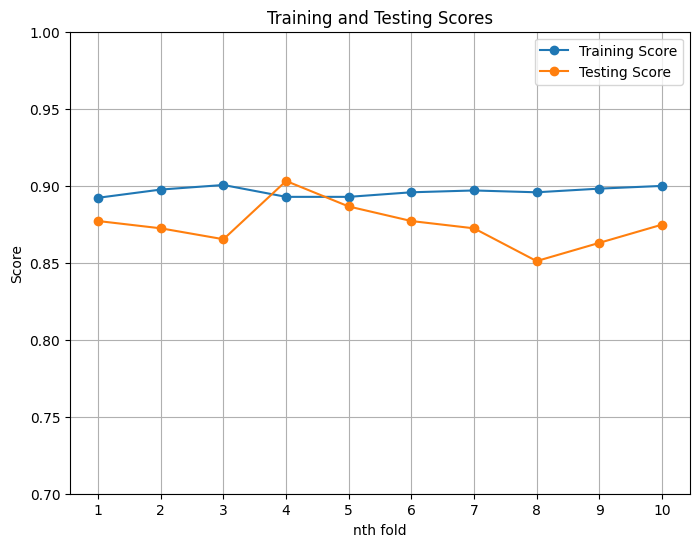

In [50]:
plot_train_test_score(train_scores, test_scores)

# loss graph

In [51]:
# import matplotlib.pyplot as plt

# # Assuming you have defined the training_cost and validation_cost lists somewhere in your code

# # Plotting the training and validation costs
# plt.plot(training_costs, color='blue', label='Training')
# plt.plot(validation_costs, color='red', label='Validation')

# # Adding labels and title
# plt.xlabel('Number of iterations')
# plt.ylabel('Cost')
# plt.title('Training and Validation Cost')

# # Adding legend
# plt.legend()

# # Display the plot
# plt.show()


# ROC AUC for Logistic regression

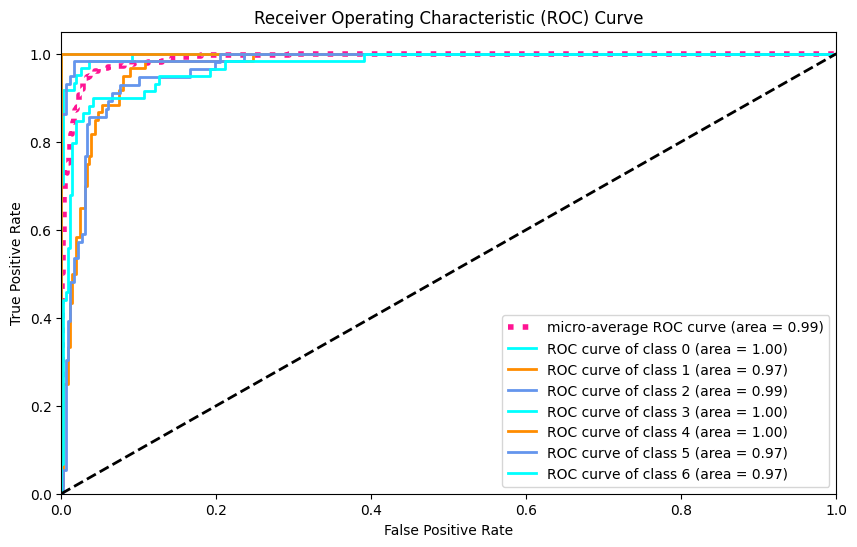

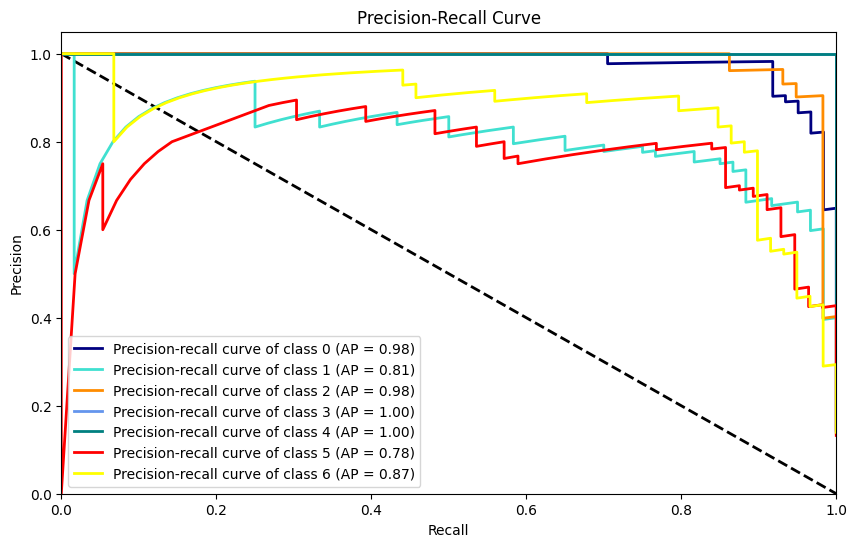

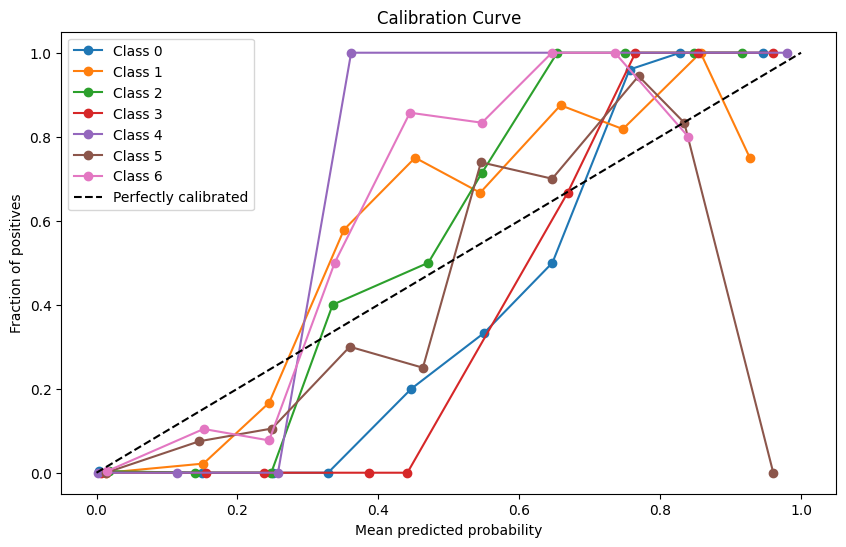

In [52]:
# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_test_pred_proba, n_classes)
plot_precision_recall_curve(y_test, y_test_pred_proba, n_classes)
plot_calibration_curve(y_test, y_test_pred_proba, n_classes)

# KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=6) 
    knn.fit(X_train_scaled, y_train)
    # Make predictions on the train set
    train_score = knn.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    # Predictions on scaled test data
    y_pred_scaled =  knn.predict(X_test_scaled)

    # Make predictions on the test set
    test_score = knn.score(X_test_scaled, y_test)
    test_scores.append(test_score)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_pred_scaled)
    precision = precision_score(y_test, y_pred_scaled, average='weighted')
    recall = recall_score(y_test, y_pred_scaled, average='weighted')
    f1 = f1_score(y_test, y_pred_scaled, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred_scaled)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Train Score: 0.8555687203791468 (±0.005337016886045137)
Test Score: 0.7921985815602837 (±0.023318130812444812)
Accuracy: 0.7921985815602837 (±0.023318130812444812)
Precision (weighted): 0.7896049201537371 (±0.023710953568023243)
Recall (weighted): 0.7921985815602837 (±0.023318130812444812)
F1-score (weighted): 0.7811191151424625 (±0.024565675928676426)
Confusion Matrix (average):
[[48.3  2.   0.3  0.   0.   1.3  0.3]
 [16.  24.6  6.   1.1  0.4  7.7  5.9]
 [ 0.3  1.4 62.   3.6  0.8  0.7  2. ]
 [ 0.1  0.2  1.  56.2  0.   0.1  0.3]
 [ 0.   0.   0.   0.3 63.2  0.1  0. ]
 [ 2.3  5.4  6.4  0.8  0.  41.1  3.3]
 [ 1.4  2.7  6.1  3.6  0.3  3.7 39.7]]


In [54]:
dump((knn, scaler), 'knn_modal.joblib')

['knn_modal.joblib']

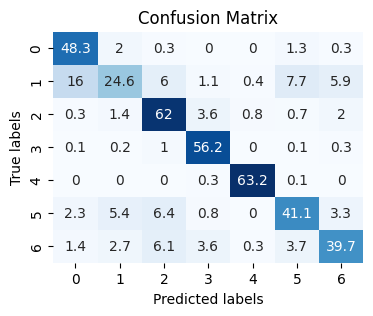

In [55]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

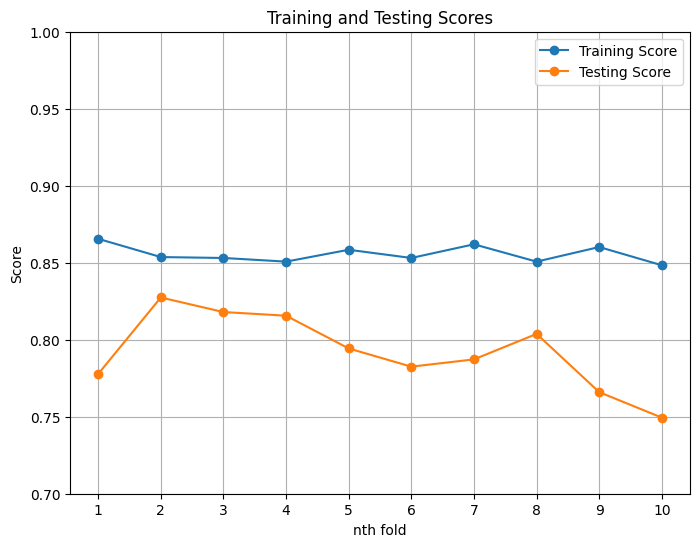

In [56]:
plot_train_test_score(train_scores, test_scores)

# SVM

In [57]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()

# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm = SVC(kernel='poly', C=1.0)
    svm.fit(X_train_scaled, y_train)
    # Make predictions on the train set
    train_score = svm.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    # Predictions on scaled test data
    y_pred_scaled =  svm.predict(X_test_scaled)

    # Make predictions on the test set
    test_score = svm.score(X_test_scaled, y_test)
    test_scores.append(test_score)

    # Evaluation metrics for scaled model
    accuracy = accuracy_score(y_test, y_pred_scaled)
    precision = precision_score(y_test, y_pred_scaled, average='weighted')
    recall = recall_score(y_test, y_pred_scaled, average='weighted')
    f1 = f1_score(y_test, y_pred_scaled, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred_scaled)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)

accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

Cross-validation results:
Train Score: 0.9152843601895736 (±0.004061406753792095)
Test Score: 0.8193853427895981 (±0.01648756101575669)
Accuracy: 0.8193853427895981 (±0.01648756101575669)
Precision (weighted): 0.8264400288811826 (±0.016779093731615777)
Recall (weighted): 0.8193853427895981 (±0.01648756101575669)
F1-score (weighted): 0.8156443779370264 (±0.017413453636368172)
Confusion Matrix (average):
[[50.8  3.1  0.   0.   0.   1.7  0. ]
 [ 6.2 33.5  3.6  0.1  0.   9.5  4.8]
 [ 0.   0.7 63.7  1.7  0.2  1.1  1.5]
 [ 0.   0.3  2.6 58.3  0.   0.   0. ]
 [ 0.   0.   0.3  0.3 64.1  0.   0. ]
 [ 0.3  6.1  6.2  0.1  0.2 40.2  2.1]
 [ 0.3  2.4 15.6  0.3  0.1  5.  36. ]]


In [58]:
dump((svm, scaler), 'svm_modal.joblib')

['svm_modal.joblib']

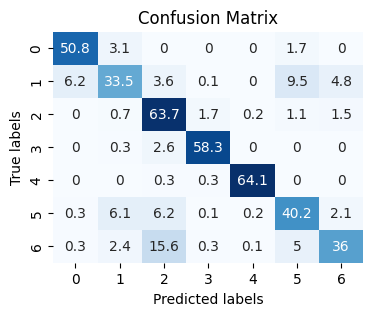

In [59]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

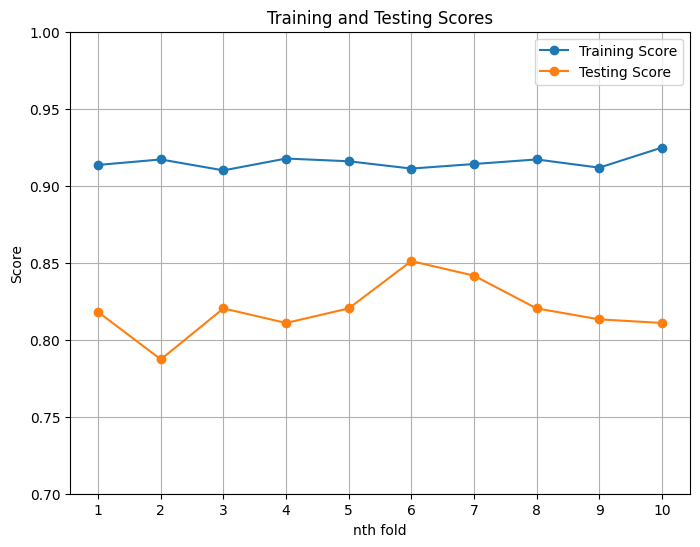

In [60]:
plot_train_test_score(train_scores, test_scores)

# Artificial Nueral Networks

In [61]:
# Initialize lists to store scores for each fold
train_scores = []
test_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ann = Sequential([
        Dense(64, kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(64, kernel_initializer='uniform', activation='relu'),
        Dropout(0.1),
        Dense(7, kernel_initializer='uniform', activation='softmax')
    ])
    ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    ann.fit(X_train_scaled, y_train, epochs=45, batch_size=45, verbose=0)
    
    # Make predictions on the train set
    train_score = ann.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
    train_scores.append(train_score)
    
    # Make predictions on the test set
    test_score = ann.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1
    test_scores.append(test_score)

    # Make predictions on the test set
    y_pred = np.argmax(ann.predict(X_test_scaled), axis=-1)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    # Append scores and metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix_result)


accuracy_data.append(accuracy_scores)
precision_data.append(precision_scores)
recall_data.append(recall_scores)
f1_data.append(f1_scores)

# Calculate mean and standard deviation of scores across all folds
train_score_mean = np.mean(train_scores)
test_score_mean = np.mean(test_scores)
accuracy_mean = np.mean(accuracy_scores)
precision_mean = np.mean(precision_scores)
recall_mean = np.mean(recall_scores)
f1_mean = np.mean(f1_scores)

train_score_std = np.std(train_scores)
test_score_std = np.std(test_scores)
accuracy_std = np.std(accuracy_scores)
precision_std = np.std(precision_scores)
recall_std = np.std(recall_scores)
f1_std = np.std(f1_scores)

# Print cross-validation results
print("Cross-validation results:")
print(f"Train Score: {train_score_mean} (±{train_score_std})")
print(f"Test Score: {test_score_mean} (±{test_score_std})")
print(f"Accuracy: {accuracy_mean} (±{accuracy_std})")
print(f"Precision (weighted): {precision_mean} (±{precision_std})")
print(f"Recall (weighted): {recall_mean} (±{recall_std})")
print(f"F1-score (weighted): {f1_mean} (±{f1_std})")
print("Confusion Matrix (average):")
print(np.mean(confusion_matrices, axis=0))

/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/home/surajprajapati/Documents/Hackethon/ObesityLevelPrediction/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Cross-validation results:
Train Score: 0.9947867214679718 (±0.002082734295318109)
Test Score: 0.9574468076229096 (±0.008845532293607619)
Accuracy: 0.9574468085106383 (±0.008845525737054204)
Precision (weighted): 0.9586739694819555 (±0.008351055332106427)
Recall (weighted): 0.9574468085106383 (±0.008845525737054204)
F1-score (weighted): 0.9574996102373827 (±0.0088555321191035)
Confusion Matrix (average):
[[52.2  2.   0.   0.   0.   0.   0. ]
 [ 3.  50.5  0.   0.   0.   3.3  0. ]
 [ 0.   0.  66.4  0.2  0.   0.1  0.9]
 [ 0.   0.   1.2 59.2  0.1  0.   0.1]
 [ 0.   0.   0.   0.1 67.5  0.   0. ]
 [ 0.   1.8  0.   0.   0.  53.4  2. ]
 [ 0.   0.   0.5  0.   0.   2.7 55.8]]


In [62]:
from keras.models import load_model
import keras

# Save the Keras model
# ann.save('ann_model.h5')
keras.saving.save_model(ann, 'ann.keras')

# Save the scaler using joblib
from joblib import dump
dump(scaler, 'scaler.joblib')



['scaler.joblib']

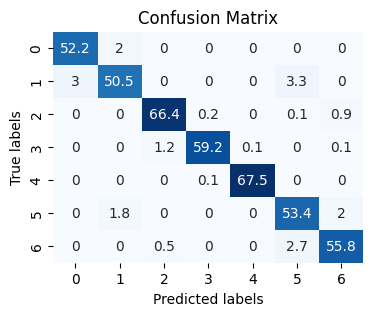

In [63]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

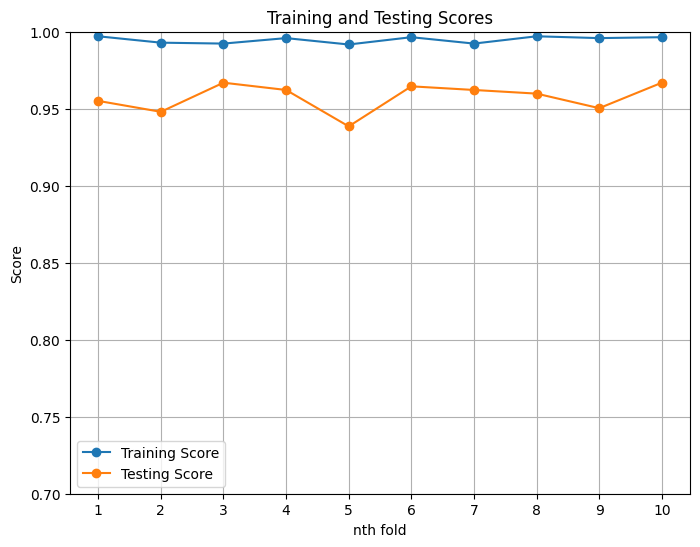

In [64]:
plot_train_test_score(train_scores, test_scores)

# ROC AUC for ANN

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


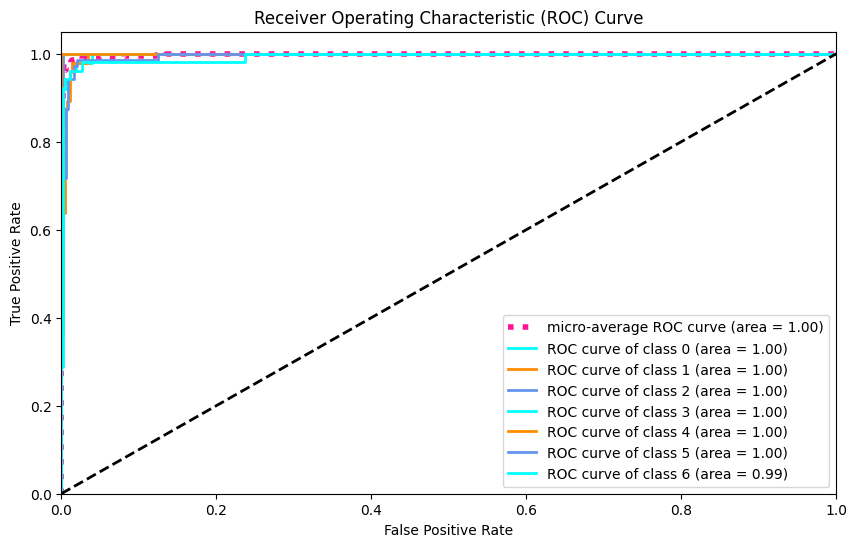

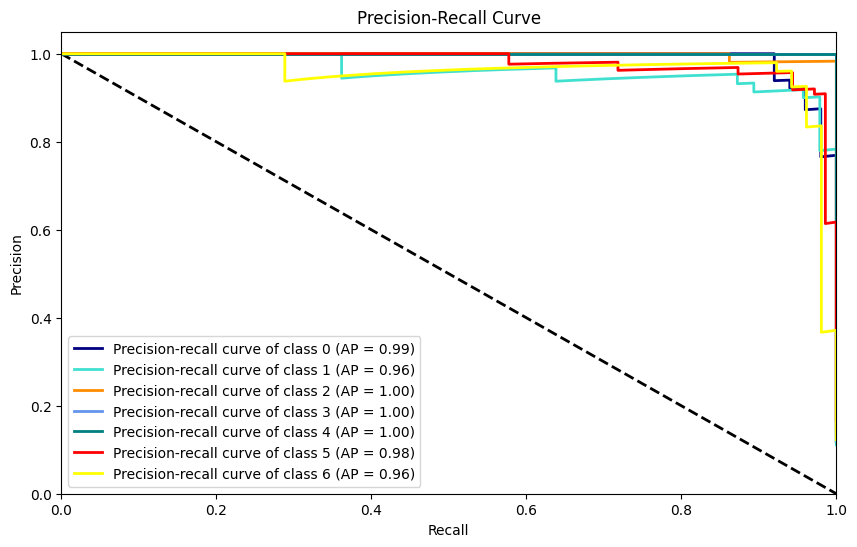

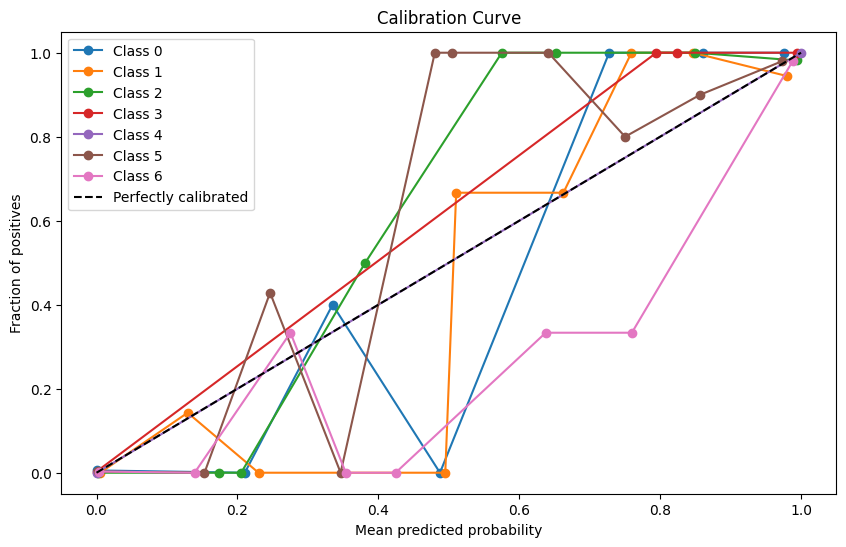

In [65]:
y_pred_proba = ann.predict(X_test_scaled)

# Assuming n_classes is the number of classes in your classification problem
n_classes = 7
plot_roc_curve(y_test, y_pred_proba, n_classes)
plot_precision_recall_curve(y_test, y_pred_proba, n_classes)
plot_calibration_curve(y_test, y_pred_proba, n_classes)

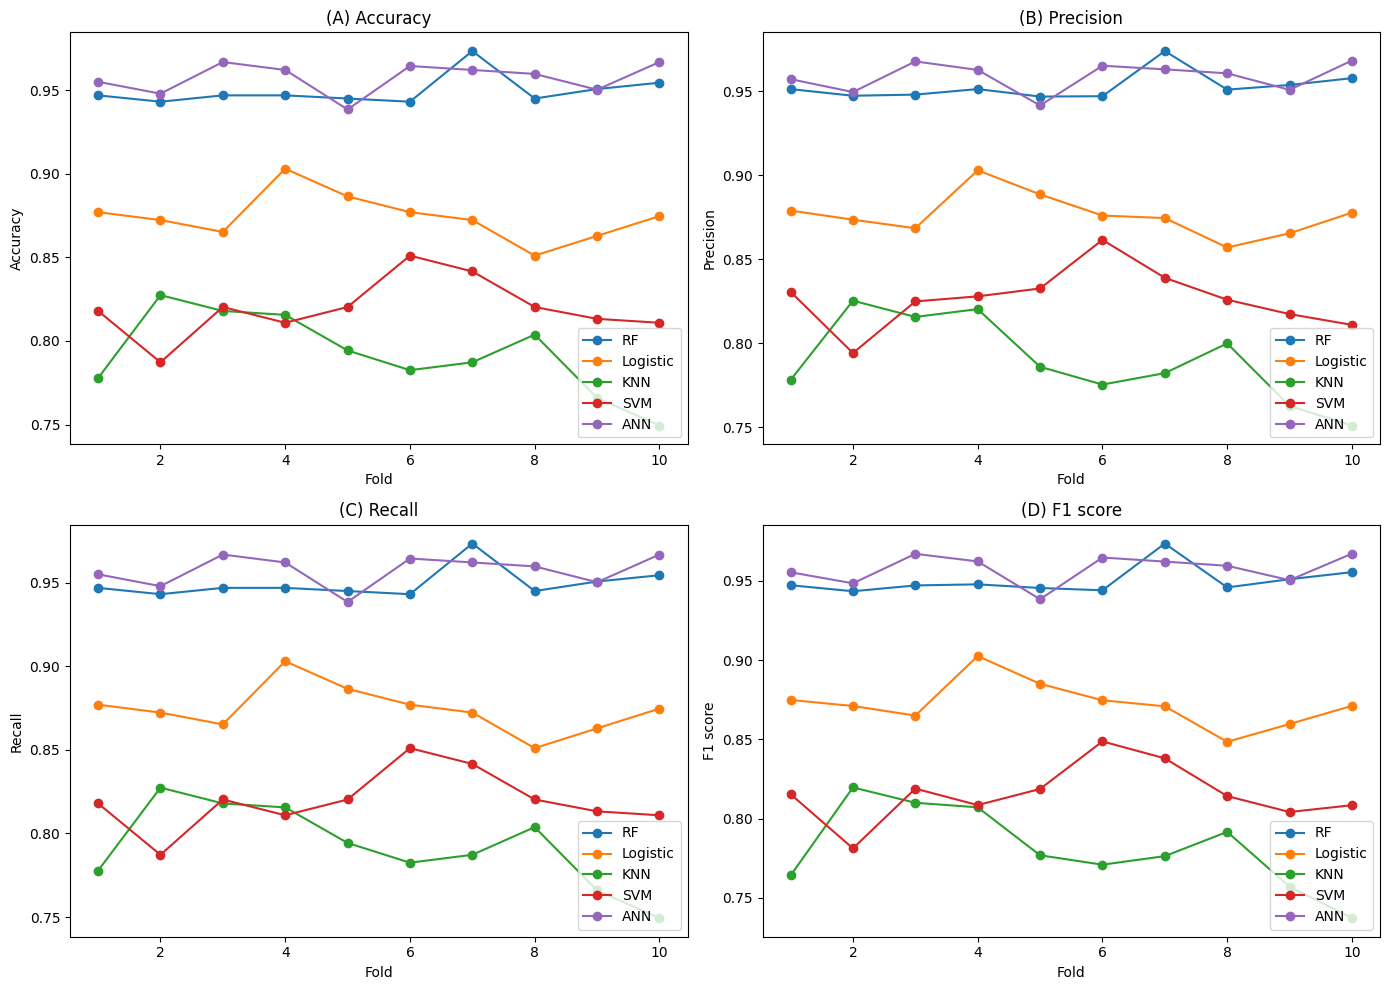

In [66]:
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = ["RF", 'Logistic', 'KNN', 'SVM', 'ANN']  # List of classifiers

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy
axs[0, 0].set_title('(A) Accuracy')
for i, classifier in enumerate(classifiers):
    axs[0, 0].plot(range(1, 11), accuracy_data[i], marker='o', label=classifier)
axs[0, 0].set_xlabel('Fold')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot Precision
axs[0, 1].set_title('(B) Precision')
for i, classifier in enumerate(classifiers):
    axs[0, 1].plot(range(1, 11), precision_data[i], marker='o', label=classifier)
axs[0, 1].set_xlabel('Fold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plot Recall
axs[1, 0].set_title('(C) Recall')
for i, classifier in enumerate(classifiers):
    axs[1, 0].plot(range(1, 11), recall_data[i], marker='o', label=classifier)
axs[1, 0].set_xlabel('Fold')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plot F1 score
axs[1, 1].set_title('(D) F1 score')
for i, classifier in enumerate(classifiers):
    axs[1, 1].plot(range(1, 11), f1_data[i], marker='o', label=classifier)
axs[1, 1].set_xlabel('Fold')
axs[1, 1].set_ylabel('F1 score')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# Learning Curves

In [67]:
# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
# from sklearn.svm import SVC

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, (estimator, name) in enumerate(zip([ RFclassifier, svm, logreg], ["RandomForest", "SVM", "LogisticRegression"])):
#     display = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, labels = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {name}")

# plt.tight_layout()
# plt.show()


In [68]:


# # Define your models' names
# model_names = ["KNN", "ANN"]
# models = [knn, ann]
# fig, ax = plt.subplots(nrows=1, ncols=len(models), figsize=(5*len(models), 6), sharey=True)

# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 10),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, (estimator, name) in enumerate(zip(models, model_names)):
#     if isinstance(estimator, Sequential):
#         # Train ANN model
#         history = estimator.fit(X_train, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)
#         # Plot learning curve for ANN
#         train_accuracy = history.history['accuracy']
#         val_accuracy = history.history['val_accuracy']
#         epochs = range(1, len(train_accuracy) + 1)
#         ax[ax_idx].plot(epochs, train_accuracy, 'o-', color="r", label="Training Accuracy")
#         ax[ax_idx].plot(epochs, val_accuracy, 'o-', color="g", label="Validation Accuracy")
#         ax[ax_idx].set_title(f"Learning Curve for {name}")
#         ax[ax_idx].set_xlabel("Epoch")
#         ax[ax_idx].set_ylabel("Accuracy")
#         ax[ax_idx].legend(loc="best")
#     else:
#         display = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#         handles, labels = ax[ax_idx].get_legend_handles_labels()
#         ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#         ax[ax_idx].set_title(f"Learning Curve for {name}")

# plt.tight_layout()
# plt.show()


# Cross validation

In [69]:
# cv_scores_train = []
# cv_scores_test = []
# scaler = StandardScaler()

# for i in range(10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     model = LogisticRegression(max_iter=1000, penalty="l2", solver="saga")
#     model.fit(X_train_scaled, y_train)

#     train_score = model.score(X_train_scaled, y_train)
#     test_score = model.score(X_test_scaled, y_test)

#     cv_scores_train.append(train_score)
#     cv_scores_test.append(test_score)

# mean_cv_score_train = np.mean(cv_scores_train)
# print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score_train}")

# mean_cv_score_test = np.mean(cv_scores_test)
# print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score_test}")

In [70]:
# print(cv_scores_train)
# print(cv_scores_test)

In [71]:

# # Define your models' names
# model_names = ["SVM", "ANN"]
# models = [svm, ann]
# fig, ax = plt.subplots(nrows=1, ncols=len(models), figsize=(5*len(models), 6), sharey=True)

# common_params = {
#     "X": X_scaled,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, (estimator, name) in enumerate(zip(models, model_names)):
#     if isinstance(estimator, Sequential):
#         # Train ANN model
#         history = estimator.fit(X_train, y_train, epochs=45, batch_size=45, verbose=0, validation_split=0.2)
#         # Plot learning curve for ANN
#         train_accuracy = history.history['accuracy']
#         val_accuracy = history.history['val_accuracy']
#         epochs = range(1, len(train_accuracy) + 1)
#         ax[ax_idx].plot(epochs, train_accuracy, 'o-', color="r", label="Training Accuracy")
#         ax[ax_idx].plot(epochs, val_accuracy, 'o-', color="g", label="Validation Accuracy")
#         ax[ax_idx].set_title(f"Learning Curve for {name}")
#         ax[ax_idx].set_xlabel("Epoch")
#         ax[ax_idx].set_ylabel("Accuracy")
#         ax[ax_idx].legend(loc="best")
#     else:
#         display = LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#         handles, labels = ax[ax_idx].get_legend_handles_labels()
#         ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#         ax[ax_idx].set_title(f"Learning Curve for {name}")

# plt.tight_layout()
# plt.show()
